In [1]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

Restrict to Pacific data: take a square
Extremal points:
- North: 60, 140 ; 60, 360-107
- West: -70, 140 ; -70, 360-107

In [2]:
def get_mask(X, coords):
    return (X.lat <= coords[0]) & (X.lat >= coords[1]) & (X.lon >= coords[2]) & (X.lon <= coords[3])

def get_pacific_data(X, mask):
    # Five rectangles to cover pacific from top to bottom
    mask1 = (X.lat <= 60) & (X.lat >= 51) & (X.lon >= 140) & (X.lon <= 360 - 165)
    mask2 = (X.lat <= 50) & (X.lat >= 26) & (X.lon >= 140) & (X.lon <= 360 - 125)
    mask3 = (X.lat <= 25) & (X.lat >= 12) & (X.lon >= 140) & (X.lon <= 360 - 110)
    mask4 = (X.lat <= 11) & (X.lat >= -6) & (X.lon >= 140) & (X.lon <= 360 - 90)
    mask5 = (X.lat <= -7) & (X.lat >= -70) & (X.lon >= 152) & (X.lon <= 360 - 80)
    res = X.copy()
    res = res.where(mask, drop=True)
    return res

# Load data

In [3]:
X_ds = xr.open_dataset('el_nino_X_public_train.nc')
y_array =np.load('el_nino_y_public_train.npy')

In [5]:
def get_area_mean(tas, lat_bottom, lat_top, lon_left, lon_right):
    """The array of mean temperatures in a region at all time points."""
    return tas.loc[:, lat_bottom:lat_top, lon_left:lon_right].mean(dim=('lat','lon'))
def get_mean(tas, coords):
    """The array of mean temperatures in the El Nino 3.4 region at all time points."""
    return get_area_mean(tas, coords[0], coords[1], coords[2], coords[3])

In [6]:
enso = get_mean(X_ds['tas'], en)

In [59]:
en=[-5, 5, 190, 240]
up=[25, 35, 360 - 170, 360 - 120]
left=[-5, 5, 120, 170]
bottom=[-35, -25, 360-170, 360-120]
right=[-5, 5, 260, 310]
masks_coords = [up, left, bottom, right]

rectangle=[-15, 15, 165, 265]

In [60]:
X_pacific = X_ds['tas'].loc[:, rectangle[0]:rectangle[1], rectangle[2]:rectangle[3]]

In [61]:
X_pacific

<xarray.DataArray 'tas' (time: 1428, lat: 7, lon: 20)>
[199920 values with dtype=float64]
Coordinates:
    height   float64 2.0
  * lat      (lat) float64 -15.0 -10.0 -5.0 0.0 5.0 10.0 15.0
  * lon      (lon) float64 167.5 172.5 177.5 182.5 187.5 192.5 197.5 202.5 ...
  * time     (time) datetime64[ns] 1700-01-16 1700-02-13 1700-03-16 ...

In [41]:
el_nino_lats = [en_lat_bottom, en_lat_top, en_lat_top, en_lat_bottom]
el_nino_lons = [en_lon_right, en_lon_right, en_lon_left, en_lon_left]

from matplotlib.patches import Polygon

def plot_map(X_ds, time_index):
    def draw_screen_poly(lats, lons, m):
        x, y = m(lons, lats)
        xy = list(zip(x, y))
        poly = Polygon(xy, edgecolor='black', fill=False)
        plt.gca().add_patch(poly)

    lons, lats = np.meshgrid(X_ds['lon'], X_ds['lat'])

    fig = plt.figure()
    ax = fig.add_axes([0.05, 0.05, 0.9,0.9])
    map = Basemap(llcrnrlon=0, llcrnrlat=-89, urcrnrlon=360, urcrnrlat=89, projection='mill')
    # draw coastlines, country boundaries, fill continents.
    map.drawcoastlines(linewidth=0.25)
    #map.drawcountries(linewidth=0.25)
    #map.fillcontinents(color='coral',lake_color='aqua')
    # draw the edge of the map projection region (the projection limb)
    #map.drawmapboundary(fill_color='aqua')
    im = map.pcolormesh(
        lons, lats, X_ds[time_index] - 273.15, shading='flat', cmap=plt.cm.jet, latlon=True)
    cb = map.colorbar(im,"bottom", size="5%", pad="2%")
    draw_screen_poly(el_nino_lats, el_nino_lons, map)

    time_str = str(pd.to_datetime(str(X_ds['time'].values[time_index])))[:7]
    ax.set_title("Temperature map " + time_str)
    #plt.savefig("test_plot.pdf")
    plt.show()

In [ ]:
ul_enso = X_ds['tas'].loc[:, 0:5, 360-170:197.5].mean(dim=('lat', 'lon'))
ur_enso = X_ds['tas'].loc[:, 0:5, 197.5:360-120].mean(dim=('lat', 'lon'))
bl_enso = X_ds['tas'].loc[:, -5:0, 360-170:197.5].mean(dim=('lat', 'lon'))
br_enso = X_ds['tas'].loc[:, -5:0, 197.5:360-120].mean(dim=('lat', 'lon'))

In [ ]:
np.corrcoef(enso,ul_enso)
plt.plot(enso, ul_enso)
plt.plot(range(295,305), range(295,305))

In [ ]:
np.corrcoef(enso, ur_enso)
plt.plot(enso, ur_enso)
plt.plot(range(295,305), range(295,305))

In [ ]:
np.corrcoef(enso, bl_enso)
plt.plot(enso, bl_enso)
plt.plot(range(295,305), range(295,305))

In [ ]:
np.corrcoef(enso, br_enso)
plt.plot(enso, br_enso)
plt.plot(range(295,305), range(295,305))

In [14]:
mask = (get_mask(X_ds, en) | get_mask(X_ds, up) | get_mask(X_ds, left) | get_mask(X_ds, bottom) | get_mask(X_ds, right))
X_pacific = X_ds.where(mask, drop=True)

IndexError: The indexing operation you are attempting to perform is not valid on netCDF4.Variable object. Try loading your data into memory first by calling .load().

Original traceback:
Traceback (most recent call last):
  File "/Users/antoine/anaconda/lib/python2.7/site-packages/xarray/backends/netCDF4_.py", line 53, in __getitem__
    data = getitem(self.array, key)
  File "netCDF4/_netCDF4.pyx", line 3671, in netCDF4._netCDF4.Variable.__getitem__ (netCDF4/_netCDF4.c:37127)
  File "/Users/antoine/anaconda/lib/python2.7/site-packages/netCDF4/utils.py", line 361, in _StartCountStride
    start[...,i] = np.apply_along_axis(lambda x: e*x, i, np.ones(sdim[:-1]))
  File "/Users/antoine/anaconda/lib/python2.7/site-packages/numpy/lib/shape_base.py", line 91, in apply_along_axis
    res = func1d(arr[tuple(i.tolist())], *args, **kwargs)
IndexError: index 0 is out of bounds for axis 2 with size 0


In [ ]:

X_pacific = X_ds.where(get_mask(X_ds, en), drop=True)

In [ ]:
up_mean = get_mean(X_ds['tas'], up)
left_mean = get_mean(X_ds['tas'], left)
bottom_mean = get_mean(X_ds['tas'], bottom)
right_mean = get_mean(X_ds['tas'], right)

In [ ]:
def plotMonthCorrelation(who, mos):
    who_grouped = who.groupby('time.month')
    for emonth, egrouped in enso.groupby('time.month'):
        for month, grouped in who_grouped:
            if emonth==month and month in mos: plt.plot(egrouped, grouped)

In [ ]:
plotMonthCorrelation(right_mean, [7,8,9])
plt.plot(range(295,305), range(295,305))

In [ ]:
np.corrcoef(enso, bottom_mean)

In [ ]:
np.corrcoef(enso, right_mean)

In [ ]:
right_mean.plot()
enso.plot()

In [ ]:
enso.plot()

# Pacific data
## Loading

In [ ]:
X_pacific = get_pacific_data(X_ds)

In [ ]:
X_pacific

In [ ]:
X_pacific.lat

In [ ]:
X_pacific.lon

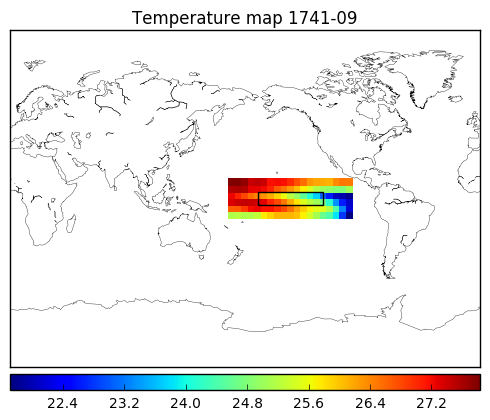

In [65]:
t = 500
plot_map(X_pacific.fillna(273.15), t)

In [ ]:
X_pacific['tas'].loc[:,60,:]

## Description
### El nino zone

In [ ]:
X_pacific['tas'].loc[:, -5, 192.5].plot()
X_pacific['tas'].loc[:, 5, 192.5].plot()

np.corrcoef(X_pacific['tas'].loc[:, -5, 192.5].values,
            X_pacific['tas'].loc[:, 5, 192.5].values)

In [ ]:
X_pacific['tas'].loc[:, -5, 242.5].plot()
X_pacific['tas'].loc[:, 5, 242.5].plot()
np.corrcoef(X_pacific['tas'].loc[:, -5, 242.5].values,
            X_pacific['tas'].loc[:, 5, 242.5].values)

Temperature looks correlated to the longitude in the el nino zone; surprising...

In [ ]:
np.corrcoef(X_pacific['tas'].loc[:, -5, 242.5].values,
            X_pacific['tas'].loc[:, 0, 212.5].values)

In [ ]:
np.corrcoef(X_pacific['tas'].loc[:, 5, 242.5].values,
            X_pacific['tas'].loc[:, 0, 212.5].values)

In [ ]:
np.corrcoef(X_pacific['tas'].loc[:, 5, 192.5].values,
            X_pacific['tas'].loc[:, 0, 212.5].values)

In [ ]:
np.corrcoef(X_pacific['tas'].loc[:, -5, 192.5].values,
            X_pacific['tas'].loc[:, 0, 212.5].values)

In [ ]:
#X_pacific['tas'].loc[:, 5, 192.5].plot()
np.corrcoef(X_pacific['tas'].loc[:, 50, 192.5].values,
            X_pacific['tas'].loc[:, -45, 192.5].values)

In [ ]:
start=np.datetime64('1752-02')
end=np.datetime64('1753-12')
X_pacific['tas'].loc[start:end, 0, 212.5].plot()
X_pacific['tas'].loc[start:end, 50, 192.5].plot()
X_pacific['tas'].loc[start:end, -45, 192.5].plot()
xcoords = [np.datetime64('1752-09-15'),
           np.datetime64('1753-02-15'),
           np.datetime64('1753-08-15')]
for xc in xcoords:
    plt.axvline(x=xc)

In [ ]:
start=np.datetime64('1750-02')
end=np.datetime64('1760-12')
X_pacific['tas'].loc[start:end, 0, 212.5].plot()

In [ ]:
class FeatureExtractor(object):

    def __init__(self):
        pass

    def transform(self, X_ds):
        """Compute the El Nino mean at time t - (12 - X_ds.n_lookahead),
        corresponding the month to be predicted."""
        # This is the range for which features should be provided. Strip
        # the burn-in from the beginning.
        valid_range = np.arange(X_ds.n_burn_in, len(X_ds['time']))
        enso = get_enso_mean(X_ds['tas'])
        # Roll the input series back so it corresponds to the month to be
        # predicted
        enso_rolled = np.roll(enso, 12 - X_ds.n_lookahead)
        # Strip burn in.
        enso_valid = enso_rolled[valid_range]
        # Reshape into a matrix of one column
        X_array = enso_valid.reshape((-1, 1))
        return X_array

In [ ]:
en_lat_bottom = -5
en_lat_top = 5
en_lon_left = 360 - 170
en_lon_right = 360 - 120

In [ ]:
class Physical_point:
    def __init__(self, lat, lon):
        self.lat = lat
        self.lon = lon
        
pacific_points = [#Physical_point(60,142.5),
                  #Physical_point(55,152.5),
                  Physical_point(50,197.5),
                  Physical_point(50,142.5),
                  Physical_point(50,237.5),
                  Physical_point(35,197.5),
                  Physical_point(25,142.5), 
                  Physical_point(25,237.5),
                  Physical_point(10,142.5)]#,
                  #Physical_point(10, 272.5)]
for i in range(-5, -45, -5):
    for j in [152.5, 277.5]: # 217.5,
        pacific_points.append(Physical_point(i,j))

en_points = [Physical_point(5,192.5),
             Physical_point(5, 242.5),
             #Physical_point(0, 217.5),
             Physical_point(-5, 192.5),
             Physical_point(-5, 242.5)]

In [ ]:
class Node:
    def __init__(self, en_series, pacific_series):
        self.en_series = en_series.values
        self.pacific_series = pacific_series.values
        
        self.C = []
        self.meanC = 0
        self.stdC = 0
        self.maxC = 0
        self.minC = 0
        
        self.W = []
        self.maxW = 0
        self.minW = 0
        
    def updateMetrics(self, t, lag):
        en_current = self.en_series[t-lag+1:t+1]
        pp_current = self.pacific_series[t-lag+1:t+1]
        C = np.corrcoef(en_current, pp_current)[0,1]
        
        self.C.append(C)
        self.meanC = np.mean(self.C)
        self.stdC = np.std(self.C)
        
        if C > self.maxC: self.maxC = C
        elif C < self.minC: self.minC = C
            
        W = (self.maxC - self.meanC)/self.stdC
        if W > self.maxW: self.maxW = W
        elif W < self.minW: self.minW = W
        
        return True
    
    def update(self, t, lag):
        self.updateMetrics(t, lag)
        return True
    
class Graph:
    def __init__(self, X_ds):
        """
        Init graph
        Every el nino point vs all pacific points
        """
        self.nodes = []
        self.n_burn_in = X_ds.n_burn_in
        for en_point in en_points:
            en_lat = en_point.lat
            en_lon = en_point.lon
            for pacific_point in pacific_points:
                pp_lat = pacific_point.lat
                pp_lon = pacific_point.lon
                self.nodes.append(Node(X_ds['tas'].loc[:, en_lat, en_lon],
                                       X_ds['tas'].loc[:, pp_lat, pp_lon]))
        print len(self.nodes)      

    def burn_in_update(self, t, lag):
        for node in self.nodes:
            node.update(t, lag)
            
    def update(self, t, lag):
        array = []
        for node in self.nodes:
            node.update(t, lag)
            array.append(node.maxC)
            array.append(node.minC)
            array.append(node.maxW)
            array.append(node.minW)
            array.append(node.stdC)
            array.append(node.meanC)
        return array
            
        
class FeatureExtractor(object):
    def __init__(self, X_ds):
        self.graph = Graph(X_ds)
    
    def transform(self, X_ds, lag):
        # Burn in update
        for t in range(X_ds.n_burn_in):
            if t%11 == 0 and t > 0: self.graph.burn_in_update(t, lag)
        
        # Prevision
        X_array = []
        for t in range(X_ds.n_burn_in, len(X_ds['time'])):
            X_array.append(self.graph.update(t, lag))
        return np.array(X_array)

In [ ]:
fE = FeatureExtractor(X_ds)
X_array = fE.transform(X_ds, 12)

In [ ]:
X_array.shape

In [ ]:
import xgboost as xgb


In [ ]:
xgb.DMatrix(X_array)

In [ ]:
import xgboost as xgb
from sklearn.base import BaseEstimator
class Regressor(BaseEstimator):
    def __init__(self):
        self.clf = xgb.sklearn.XGBRegressor(max_depth=5,
                                 learning_rate=0.1,
                                 n_estimators=100,
                                 silent=True,
                                 objective='reg:linear',
                                 nthread=1,
                                 gamma=0,
                                 min_child_weight=1,
                                 max_delta_step=0,
                                 subsample=1,
                                 colsample_bytree=1,
                                 colsample_bylevel=1,
                                 reg_alpha=0,
                                 reg_lambda=1,
                                 scale_pos_weight=1,
                                 base_score=0.5,
                                 seed=0,
                                 missing=None)
    
    def fit(self, X, y):
        self.clf.fit(X,y)
    
    def predict(self, X):
        return self.clf.predict(X)

In [ ]:
reg = Regressor()

In [ ]:
pd.DatetimeIndex(X_ds['tas'][0].time.values)

In [ ]:
int(str(X_ds['tas'][0].time.values).split("-")[1])

In [ ]:
int(01)

In [ ]:
[1, 1] + [3,4]

In [ ]:
from kera

In [ ]:
from keras.models import Sequential